# Akshitha Ajayan Juptyer HW5

## Wine Dataset

In [182]:
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn import preprocessing
samples, labels = load_wine(return_X_y=True)
samples = np.transpose(samples)

## Standardizaton of Data

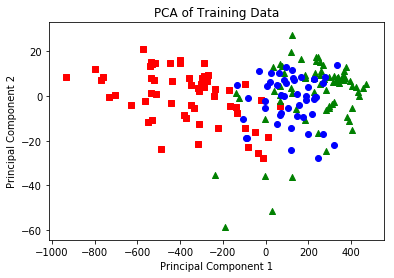

In [183]:
sumX = np.zeros((13, 1))
for i in range (0, 13):
    for j in range (0, 178):
        sumX[i, 0] = sumX[i, 0] + samples[i, j]
m = np.true_divide(sumX, 178)

mean_centered = np.zeros((13, 178))
for i in range (0, 13):
    for j in range (0, 178):
        mean_centered[i,j] = samples[i, j]-m[i, 0]
        
u, s, vh = LA.svd(mean_centered)
ukt = [u[:, 0], u[:, 1]]
ukt = np.asarray(ukt)

projx = np.zeros((2, 178))
for i in range(0, 178):
    projx[:, i] = np.matmul(ukt, mean_centered[:, i])

for i in range(0,178):
    if(labels[i]==0):
        plt.scatter(projx[0,i], projx[1,i], c='r', marker='s')
    if(labels[i]==1):
        plt.scatter(projx[0,i], projx[1,i], c='g', marker='^')
    if(labels[i]==2):
        plt.scatter(projx[0,i], projx[1,i], c='b', marker='o')
plt.title("PCA of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

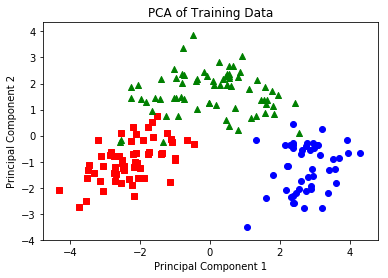

In [184]:
stddev= np.array([[np.std(attr)] for attr in mean_centered])
X = mean_centered/stddev

u, s, vh = LA.svd(X)
ukt = [u[:, 0], u[:, 1]]
ukt = np.asarray(ukt)

projx1 = np.zeros((2, 178))
for i in range(0, 178):
    projx1[:, i] = np.matmul(ukt, X[:, i])

for i in range(0,178):
    if(labels[i]==0):
        plt.scatter(projx1[0,i], projx1[1,i], c='r', marker='s')
    if(labels[i]==1):
        plt.scatter(projx1[0,i], projx1[1,i], c='g', marker='^')
    if(labels[i]==2):
        plt.scatter(projx1[0,i], projx1[1,i], c='b', marker='o')
plt.title("PCA of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The PCA features of the standardized (both centered and normalized) wine dataset would result in better classification because the data is more easily separable and thus easier to classify between the three classes compared to just the centered data. The centered data has much more overlap between the classes, making it harder for the classifer to accurately distingush between the three classes.

## Naive Bayes Classification

In [185]:
def probability(x, mean, std):
    return (1/math.sqrt(2*math.pi*(std**2)))*math.exp(-(x-mean)**2/(2*(std**2)))

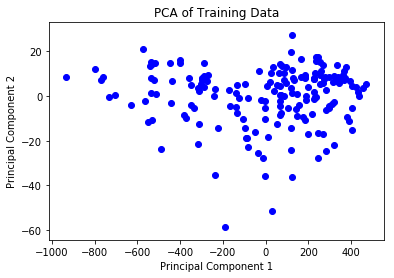

In [193]:
def classify(projx):
    class1x = []
    class1y = []
    class2x = []
    class2y = []
    class3x = []
    class3y = []

    for i in range(0,140):
        if(labels[i]==0):
            class1x.append(projx[0,i]) 
            class1y.append(projx[1,i])
        if(labels[i]==1):
            class2x.append(projx[0,i]) 
            class2y.append(projx[1,i])
        if(labels[i]==2):
            class3x.append(projx[0,i]) 
            class3y.append(projx[1,i])

    mean1x = np.mean(class1x)
    mean1y = np.mean(class1y)
    mean2x = np.mean(class2x)
    mean2y = np.mean(class2y)
    mean3x = np.mean(class3x)
    mean3y = np.mean(class3y)

    std1x = np.var(class1x)
    std1y = np.var(class1y)
    std2x = np.var(class2x)
    std2y = np.var(class2y)
    std3x = np.var(class3x)
    std3y = np.var(class3y)

    my_labels = []
    for i in range(0, 178):
        p1 = probability(projx[0,i], mean1x, std1x)*probability(projx[1,i], mean1y, std1y)
        p2 = probability(projx[0,i], mean2x, std2x)*probability(projx[1,i], mean2y, std2y)
        p3 = probability(projx[0,i], mean3x, std3x)*probability(projx[1,i], mean3y, std3y)
        arr = [p1, p2, p3]
        my_labels.append(arr.index(max(arr)))
    return my_labels

def foldK(projx):
    new_projx = projx
    for i in range(0, 35):
        temp1 = new_projx[0,i]
        temp2 = new_projx[1,i]
        new_projx[0,i] = projx[0,177-i]
        new_projx[1,i] = projx[1,177-i]
        new_projx[0,177-i] = temp1
        new_projx[1,177-i] = temp2
    return new_projx
    
my_labels = classify(projx)
my_projx1 = foldK(projx)
my_labels1 = classify(my_projx1)
my_projx2 = foldK(my_projx1)
my_labels2 = classify(my_projx2)
my_projx3 = foldK(my_projx2)
my_labels3 = classify(my_projx3)
my_projx4 = foldK(my_projx3)
my_labels4 = classify(my_projx4)

final_label = []
for i in range(0,178):
    final_label.append(math.ceil(sum([my_labels[i],my_labels1[i],my_labels2[i],my_labels3[i],my_labels4[i]]) / len([my_labels[i],my_labels1[i],my_labels2[i],my_labels3[i],my_labels4[i]])))

for i in range(0,178):
    if(final_label[i]==0):
        plt.scatter(projx[0,i], projx[1,i], c='r', marker='s')
    if(final_label[i]==1):
        plt.scatter(projx[0,i], projx[1,i], c='g', marker='^')
    if(final_label[i]==2):
        plt.scatter(projx[0,i], projx[1,i], c='b', marker='o')
plt.title("PCA of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

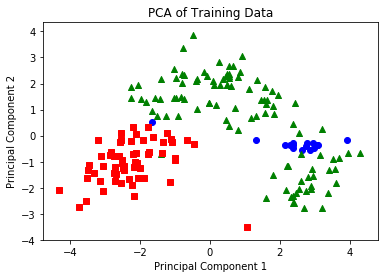

In [194]:
my_labels = classify(projx1)
my_projx1 = foldK(projx1)
my_labels1 = classify(my_projx1)
my_projx2 = foldK(my_projx1)
my_labels2 = classify(my_projx2)
my_projx3 = foldK(my_projx2)
my_labels3 = classify(my_projx3)
my_projx4 = foldK(my_projx3)
my_labels4 = classify(my_projx4)

final_label = []
for i in range(0,178):
    final_label.append(math.ceil(sum([my_labels[i],my_labels1[i],my_labels2[i],my_labels3[i],my_labels4[i]]) / len([my_labels[i],my_labels1[i],my_labels2[i],my_labels3[i],my_labels4[i]])))

for i in range(0,178):
    if(final_label[i]==0):
        plt.scatter(projx1[0,i], projx1[1,i], c='r', marker='s')
    if(final_label[i]==1):
        plt.scatter(projx1[0,i], projx1[1,i], c='g', marker='^')
    if(final_label[i]==2):
        plt.scatter(projx1[0,i], projx1[1,i], c='b', marker='o')
plt.title("PCA of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [226]:
my_label = []
clf = GaussianNB()
clf.fit(np.transpose(projx1[:, 0:139]), labels[0:139])
for i in range(140,178):
    my_label.append(clf.predict([np.transpose(projx1[:,i])]))
    
my_label = np.asarray(my_label)
my_label.flatten()
print(my_label)

[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
